In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib as mp
import matplotlib.pyplot as plt
import math as m
import sympy as smp
from IPython.display import display as disp
import lablib as ll
%matplotlib inline

In [2]:
data = {}
columns = {}
aux = {}
experiments = ["step_1", "step_2", "step_3_1", "step_3_2"]

constants = ll.read_csv("constants.csv")

for e in experiments:
    columns[e] = ll.read_csv("measurements/%s.csv" % e)
    data[e] = ll.varlist()
    ll.add(data[e],
           constants,
           ll.read_csv("constants/%s.csv" % e))

#for e in experiments:
#    disp("Data for experiment %s:" % e, data[e])
#    
#for e in experiments:
#    disp("Constants for experiment %s:" % e, work[e])

In [3]:
for e in experiments:
    disp("Data for %s (d = %f ± %f):" % (e, data[e].Value["d"], data[e].Error["d"]))
    
    ll.compute(name = "P",
               expr = lambda P_m, P_angle, P_coef: P_m * P_angle * P_coef,
               data = data[e],
               columns = columns[e])
    
    ll.compute(name = "Q",
               expr = lambda V, t: V / t,
               data = data[e],
               columns = columns[e])
    
    ll.compute(name = "L",
               expr = lambda L_1, L_2: L_2 - L_1,
               data = data[e],
               columns = columns[e],
               aux = { "L_1": { "Error": "Error_L_1_2" },
                       "L_2": { "Error": "Error_L_1_2" } })

    disp(data[e], columns[e])

'Data for step_1 (d = 0.003575 ± 0.000025):'

,Value,Error
P_coef,9.806650,0.000005
P_angle,0.200000,0.005000
d,0.003575,0.000025
L_1,0.409000,0.000500
L_2,0.809000,0.000500
L,0.400000,0.000707


,P_m,Error_P_m,V,Error_V,t,Error_t,P,Error_P,Q,Error_Q
0,10,0.5,1,0.05,68,1,19.61330,1.096417,0.014706,0.000766
1,20,0.5,2,0.05,68,1,39.22660,1.386870,0.029412,0.000853
2,30,0.5,3,0.05,70,1,58.83990,1.767919,0.042857,0.000941
3,40,0.5,4,0.05,73,1,78.45320,2.192834,0.054795,0.001016
4,50,0.5,5,0.05,77,1,98.06650,2.640521,0.064935,0.001064
5,60,0.5,6,0.10,81,1,117.67980,3.101135,0.074074,0.001536
6,70,1.0,7,0.10,87,1,137.29310,3.953187,0.080460,0.001475
7,80,1.0,8,0.10,95,1,156.90640,4.385667,0.084211,0.001376
8,90,1.0,9,0.10,100,1,176.51970,4.829215,0.090000,0.001345
9,100,1.0,10,0.10,104,1,196.13300,5.281043,0.096154,0.001334


'Data for step_2 (d = 0.003575 ± 0.000025):'

,Value,Error
P_coef,9.806650,0.000005
P_angle,0.200000,0.005000
V,5.000000,0.050000
t,72.000000,1.000000
d,0.003575,0.000025
Q,0.069444,0.001188


,L_1,L_2,Error_L_1_2,P_m,Error_P_m,P,Error_P,L,Error_L
0,0,0.109,0.0005,37,0.05,72.56921,1.816879,0.109,0.000707
1,0,0.409,0.0005,78,0.05,152.98374,3.825851,0.409,0.000707
2,0,0.709,0.0005,135,0.05,264.77955,6.620215,0.709,0.000707
3,0,1.209,0.0005,197,0.05,386.38201,9.660048,1.209,0.000707


'Data for step_3_1 (d = 0.005250 ± 0.000250):'

,Value,Error
P_coef,9.80665,0.000005
P_angle,0.20000,0.005000
L_1,0.70700,0.000500
L_2,1.20700,0.000500
d,0.00525,0.000250
L,0.50000,0.000707


,P_m,Error_P_m,V,Error_V,t,Error_t,P,Error_P,Q,Error_Q
0,20,0.5,5,0.1,60,1,39.2266,1.386870,0.083333,0.002170
1,40,0.5,10,0.1,70,1,78.4532,2.192834,0.142857,0.002491
2,60,0.5,10,0.1,60,1,117.6798,3.101135,0.166667,0.003239
3,80,0.5,10,0.1,54,1,156.9064,4.043385,0.185185,0.003897


'Data for step_3_2 (d = 0.003000 ± 0.000100):'

,Value,Error
P_coef,9.80665,0.000005
P_angle,0.20000,0.005000
L_1,0.31000,0.005000
L_2,0.61000,0.005000
d,0.00300,0.000100
L,0.30000,0.007071


,P_m,Error_P_m,V,Error_V,t,Error_t,P,Error_P,Q,Error_Q
0,20,0.5,1,0.05,70,1,39.2266,1.386870,0.014286,0.000743
1,40,0.5,2,0.05,72,1,78.4532,2.192834,0.027778,0.000794
2,60,0.5,3,0.05,75,1,117.6798,3.101135,0.040000,0.000854
3,80,0.5,4,0.05,83,1,156.9064,4.043385,0.048193,0.000837


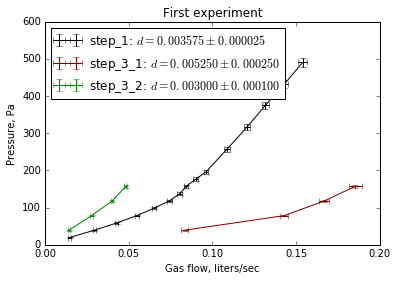

In [4]:
plt.title("First experiment")
plt.xlabel("Gas flow, liters/sec")
plt.ylabel("Pressure, Pa")

experiments = ["step_1", "step_3_1", "step_3_2"]
colors = ["black", "#800000", "#008000"]

for e, c in zip(experiments, colors):
    plt.errorbar(x = columns[e].Q,
                 y = columns[e].P,
                 xerr = columns[e].Error_Q,
                 yerr = columns[e].Error_P,
                 label = "%s: $d = %f \pm %f$" % (e, data[e].Value["d"], data[e].Error["d"]),
                 color = c)

plt.legend(loc = "best")

In [5]:
usable = {}
usable["step_1"] = 6
usable["step_3_1"] = 2
usable["step_3_2"] = 3

Initial guesses for P:
                 Error        Value
poiseuille  18.205894  1445.241983


'Final guesses for P:'

,Error,Value
poiseuille,40.208177,1453.958085


Initial guesses for P:
                 Error       Value
poiseuille  11.283306  513.110422


'Final guesses for P:'

,Error,Value
poiseuille,38.788392,518.090921


Initial guesses for P:
                 Error        Value
poiseuille  48.060162  2850.310235


'Final guesses for P:'

,Error,Value
poiseuille,52.981959,2870.740732


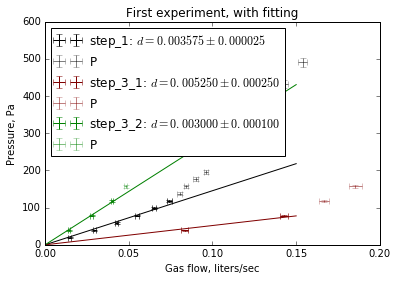

In [6]:
plt.title("First experiment, with fitting")
plt.xlabel("Gas flow, liters/sec")
plt.ylabel("Pressure, Pa")

Q_linspace = np.linspace(0, 0.15, 100)

for e, c in zip(experiments, colors):
    plt.errorbar(x = columns[e].Q[:usable[e]],
                 y = columns[e].P[:usable[e]],
                 xerr = columns[e].Error_Q[:usable[e]],
                 yerr = columns[e].Error_P[:usable[e]],
                 label = "%s: $d = %f \pm %f$" % (e, data[e].Value["d"], data[e].Error["d"]),
                 ls = "none",
                 color = c)

    plt.errorbar(x = columns[e].Q,
                 y = columns[e].P,
                 xerr = columns[e].Error_Q,
                 yerr = columns[e].Error_P,
                 ls = "none",
                 color = c,
                 alpha = 0.5)

    model = ll.fit2(name = "P",
                    model = lambda Q, poiseuille: Q * poiseuille,
                    x = columns[e].Q[:usable[e]],
                    y = columns[e].P[:usable[e]],
                    xerr = columns[e].Error_Q[:usable[e]],
                    yerr = columns[e].Error_P[:usable[e]],
                    data = data[e])
    
    plt.errorbar(x = Q_linspace,
                 y = model(Q_linspace),
                 color = c)

plt.legend(loc = "best")

<Container object of 3 artists>

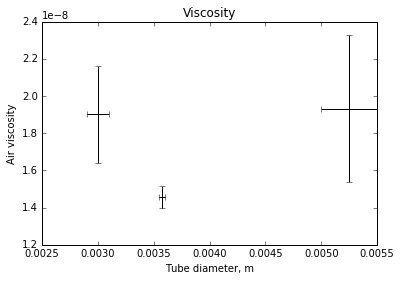

In [7]:
for e in experiments:
    ll.compute(name = "v",
               expr = lambda poiseuille, d, L: poiseuille * m.pi * (d/2)**4 / (8 * L),
               data = data[e],
               columns = columns[e])
    
plt.title("Viscosity")
plt.xlabel("Tube diameter, m")
plt.ylabel("Air viscosity")

plt.errorbar(x = [data[e].Value["d"] for e in experiments],
             y = [data[e].Value["v"] for e in experiments],
             xerr = [data[e].Error["d"] for e in experiments],
             yerr = [data[e].Error["v"] for e in experiments],
             linestyle = "none",
             color = "black")

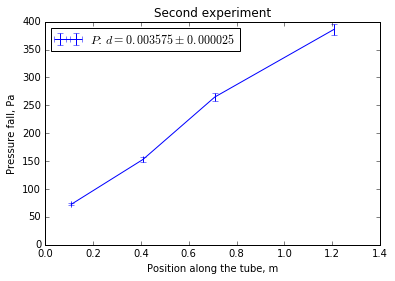

In [8]:
plt.title("Second experiment")
plt.xlabel("Position along the tube, m")
plt.ylabel("Pressure fall, Pa")

e = "step_2"
plt.errorbar(x = columns[e].L,
             y = columns[e].P,
             xerr = columns[e].Error_L,
             yerr = columns[e].Error_P,
             label = "$P$: $d = %f \pm %f$" % (data[e].Value["d"], data[e].Error["d"]))

plt.axis([0, None, 0, None])
plt.legend(loc = "best")